In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from tqdm import tqdm
import os

from P3_helpers import *

In [2]:
# Load data
df = get_dataframe()
df_vote_evolution = get_timeserie_df(df)
df_vote_evolution.sample(5)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,Vote_number
172817,Jusjih,Bovlb,1,1.0,2005.0,2005-09-23 08:22:00,'''Support'''--,1,105.650000,17
172175,Guettarda,BanyanTree,1,1.0,2005.0,2005-03-28 16:22:00,None,1,23.366667,8
174769,Hamster Sandwich,Drini,1,1.0,2005.0,2005-09-13 02:53:00,'''Support''' unreservedly!,1,140.666667,34
177322,Hall Monitor,Hermione1980,-1,1.0,2005.0,2005-10-14 22:20:00,'''Oppose''' for the time being until this edi...,1,82.400000,42
104505,Sharkface217,Rigadoun,1,1.0,2007.0,2007-11-09 06:23:00,'''Support''' Qualified. --''',1,94.300000,34


We extract the votes data, then separat them into round of election based on the processing developped in P2. Using these rounds and considering the first vote of each round as the starting time of the round (voting time = 0), we compute the voting time of each vote.

In [3]:
# Create folder for plots
if not os.path.exists('Figures'):
    os.makedirs('Figures')

# Quantity of votes through time

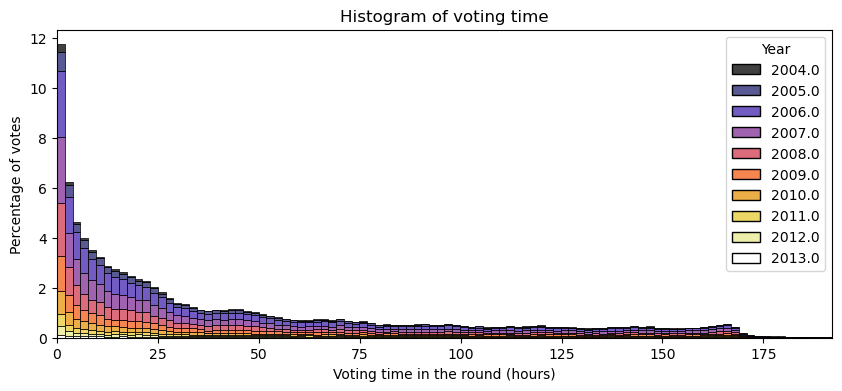

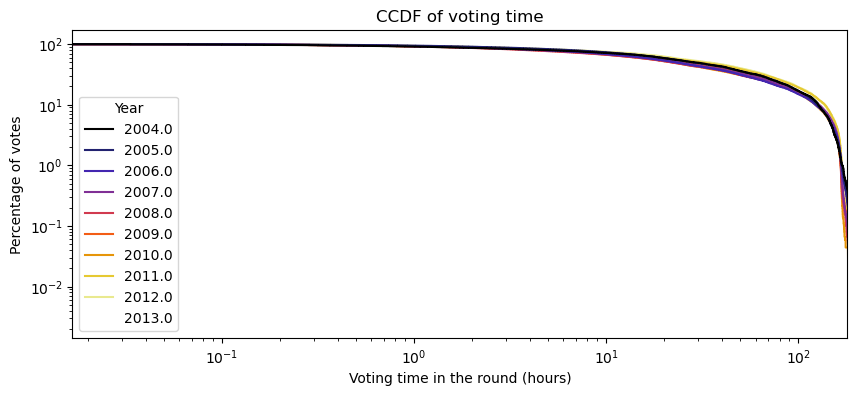

In [4]:
# Distribution of votes in round of election
pdf_voting_time(df_vote_evolution)
cdf_voting_time(df_vote_evolution)

We checked the distribution of voting time of each vote. We can see that the distribution is heavy tailed but bounded (due to the decision we made to split the vote into round of election). To assess whether the distribution is a power law we plot the complementary cumulative distribution function (CCDF) of the voting time in a log-log scale but this plot does not show a linear behavior. We can conclude that the distribution is not a power law.

# Evolution of votes proportions through time

In [5]:
df_vote_evolution = get_progressive_mean(df_vote_evolution)
df_vote_evolution.sample(5)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,Vote_number,progressive_mean
69810,Mattinbgn,Travellingcari,1,1.0,2008.0,2008-05-17 13:18:00,'''Support''' I don't always agree with her Af...,2,2 days 11:45:00,55,0.909091
70997,Kyaa the Catlord,Ynhockey,1,1.0,2008.0,2008-10-22 09:04:00,'''Support''' Fantastic editor. Give him the mop.,3,0 days 14:18:59.999999997,33,0.575758
33098,Richard0612,Amalthea,1,1.0,2009.0,2009-02-14 12:42:00,"'''Support''' - Helpful and clueful, two thing...",1,0 days 00:40:59.999999998,3,1.000000
86416,Espresso Addict,Anonymous Dissident,0,1.0,2007.0,2007-08-28 12:07:00,I'm worried about the editor's understanding o...,2,0 days 14:33:00,65,0.953846
22706,Begoon,Jmh649,1,1.0,2010.0,2010-08-13 16:16:00,"'''Support''' - impressive contributor, who I ...",1,0 days 08:21:00,17,0.647059


To evaluate the progression of the election in function of the incoming votes we compute the progressive mean for each target and each round of election. 

#### Tendencies, center and dispersion

Using the progressive mean we now want to compare the evolution of the election between target that are accepted and target that are rejected. In this end, we compute the median and first and last quartiles of the progressive mean as well as the mean and 95% confidence interval. We do this in function of the voting time using a rolling average, as well as in function of the number of votes casted to have a better idea of the evolution of the election and also to see if the pattern is different if considering the timing of the votes or the order of the votes. 

In [6]:
# Moving average of the progressive mean by filtering the data with a window of 1 hour
rolling_avg = df_vote_evolution.groupby(['Results', pd.Grouper(key='Voting_time', freq='1h', origin='start')])

# Compute the median, first and last quartile
quartiles = get_quartiles(rolling_avg, 'Voting_time')

# Compute the mean and 95% confidence interval
sem = get_confidence_interval(rolling_avg, 'Voting_time')

# Display the results
display(quartiles.sample(5))
display(sem.sample(5))

,Results,Voting_time,lower,center,upper
614,1.0,577.0,0.918919,0.918919,0.918919
592,1.0,490.0,0.967391,0.978261,0.989130
122,-1.0,122.0,0.155172,0.328571,0.445455
533,1.0,331.0,0.234483,0.234483,0.234483
606,1.0,532.0,0.909091,0.909091,0.909091


,Results,Voting_time,center,sem,lower,upper
320,1.0,100.0,0.855608,0.009141,0.837691,0.873525
327,1.0,107.0,0.847052,0.009959,0.827532,0.866572
426,1.0,206.0,0.971335,0.010808,0.950150,0.992519
224,1.0,4.0,0.916054,0.003229,0.909726,0.922382
172,-1.0,172.0,0.326003,0.036207,0.255037,0.396969


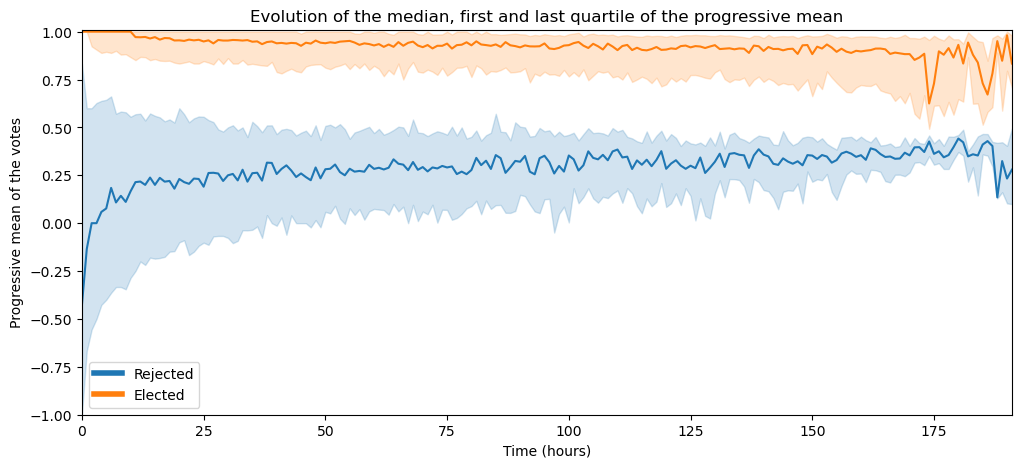

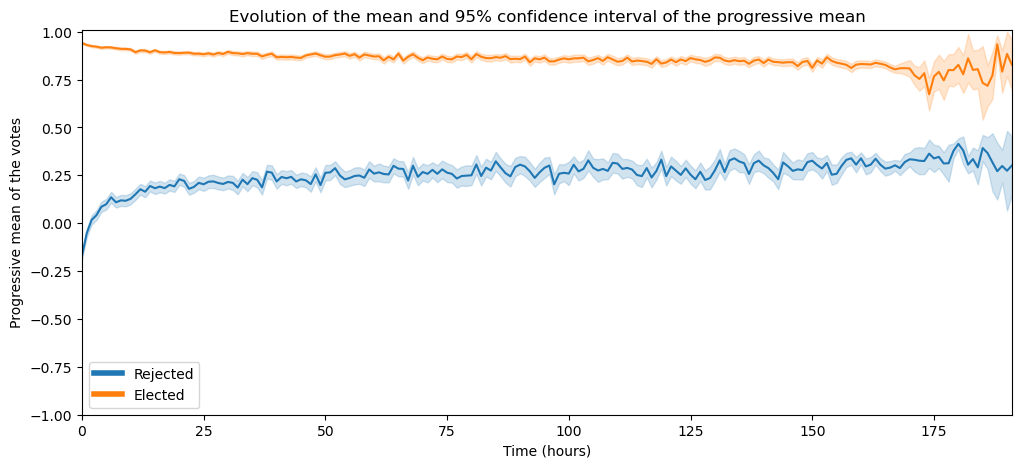

In [7]:
# Plot the evolution of the median, first and last quartile of the progressive mean
ax = plot_vote_evolution(quartiles, 'Voting_time')
ax.set_title('Evolution of the median, first and last quartile of the progressive mean')
plt.savefig('Figures/median_quartiles_over_time.png')
plt.show()

# Plot the evolution of the mean and 95% confidence interval of the progressive mean
ax = plot_vote_evolution(sem, 'Voting_time')
ax.set_title('Evolution of the mean and 95% confidence interval of the progressive mean')
plt.savefig('Figures/mean_ci_over_time.png')
plt.show()


In [8]:
# Election evolution by vote number
vote_nb = df_vote_evolution.groupby(['Results', 'Vote_number'])
# Compute the median, first and last quartile
quartiles = get_quartiles(vote_nb, 'Vote_number')

# Compute the mean and 95% confidence interval
sem = get_confidence_interval(vote_nb, 'Vote_number')

# Display the results
display(quartiles.sample(5))
display(sem.sample(5))

,Results,Vote_number,lower,center,upper,Voting_time
384,1.0,108,0.759259,0.898148,0.981481,12.400000
243,-1.0,244,0.282787,0.360656,0.372951,126.200000
135,-1.0,136,0.221219,0.327206,0.470588,22.466667
377,1.0,101,0.732673,0.905941,0.980198,11.966667
249,-1.0,250,0.358000,0.364000,0.410000,140.583333


,Results,Vote_number,center,sem,lower,upper,Voting_time
218,-1.0,219,0.380708,0.057539,0.267932,0.493483,75.183333
84,-1.0,85,0.322744,0.019382,0.284756,0.360732,7.866667
156,-1.0,157,0.331608,0.047430,0.238645,0.424572,28.350000
148,-1.0,149,0.308789,0.046006,0.218617,0.398961,25.450000
330,1.0,54,0.877157,0.004771,0.867805,0.886509,3.233333


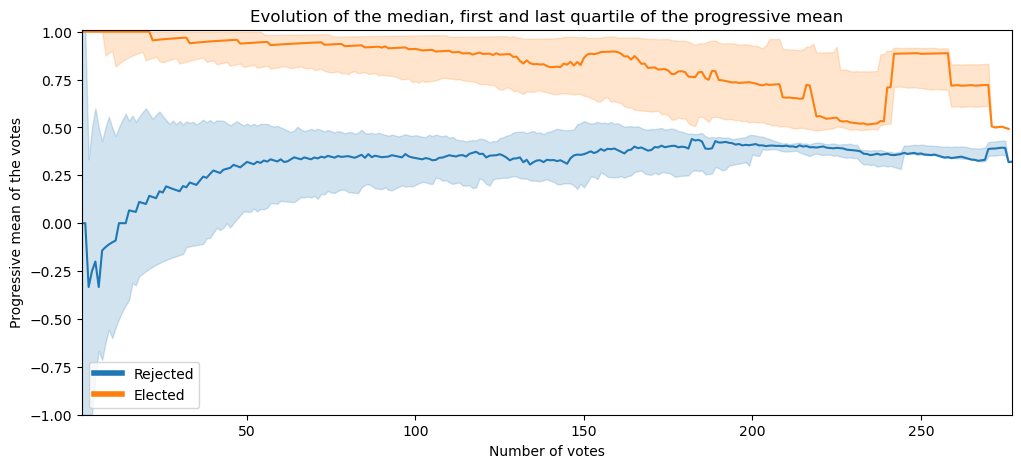

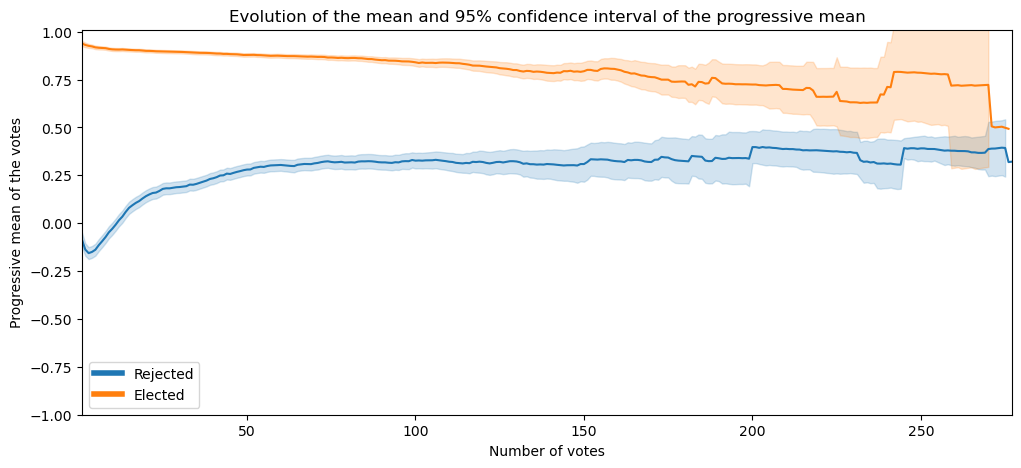

In [9]:
# Plot the evolution of the median, first and last quartile of the progressive mean
ax = plot_vote_evolution(quartiles, 'Vote_number')
ax.set_title('Evolution of the median, first and last quartile of the progressive mean')
plt.savefig('Figures/median_quartiles_over_n_votes.png')
plt.show()

# Plot the evolution of the mean and 95% confidence interval of the progressive mean
ax = plot_vote_evolution(sem, 'Vote_number')
ax.set_title('Evolution of the mean and 95% confidence interval of the progressive mean')
plt.savefig('Figures/mean_ci_over_n_votes.png')
plt.show()

The resulting plots show a clear difference between the evolution of the election for accepted and rejected targets, in particular we can see that the interquartile ranges do not overlap. Additionally, we can note that the gap between the two groups reagrding mean and median is actually larger at the begining of the election and then reduces (the values for the accepted targets decrease and the values for the rejected ones increase). These observations are good indicators of a clear difference between the two groups: it looks like in a large majority of cases the decision to accept or not the target is globally consensual and the outcome of the election can be predicted early on in the process.

#### Scatter plots and density

To have a better comprehension of the evolution of the election we also plot the histogram of the progressive mean for each target and each round of election. Note that we use a log scale for the count of votes to have a better visualization of the distribution being heavy tailed. Same as before, we plot the histogram in function of the voting time and in function of the number of votes casted for the accepted and rejected targets separately. 

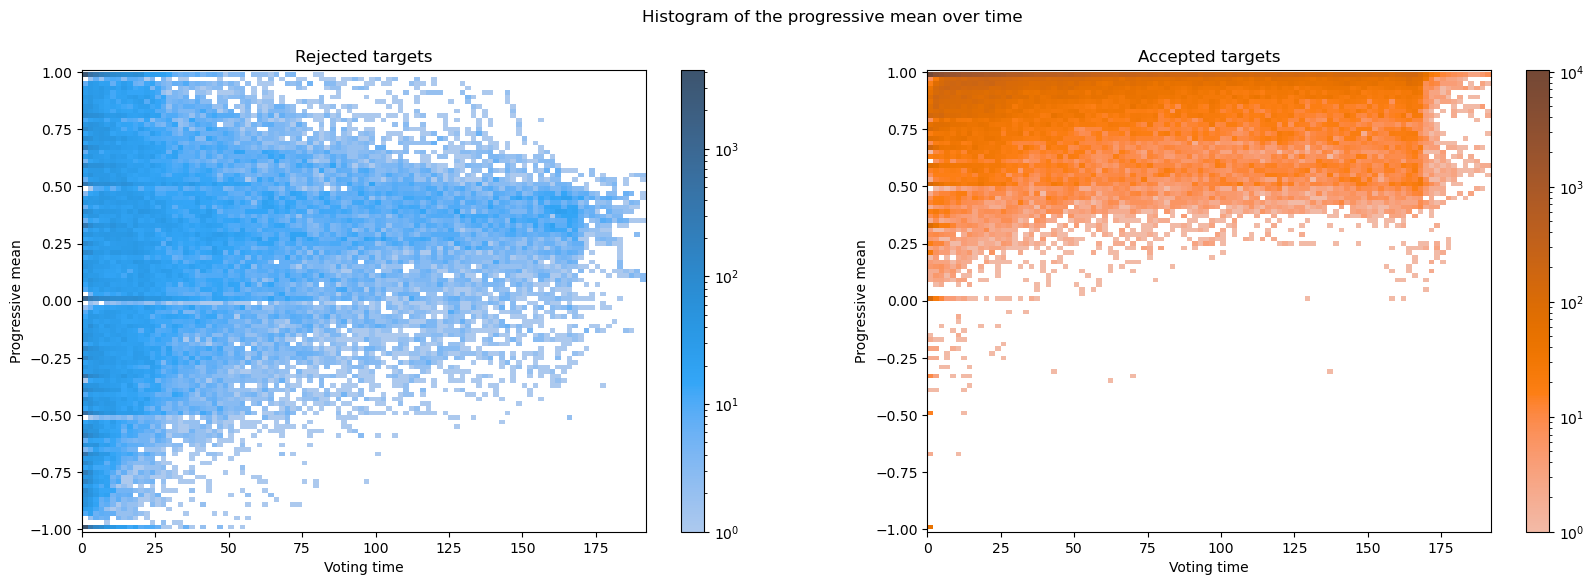

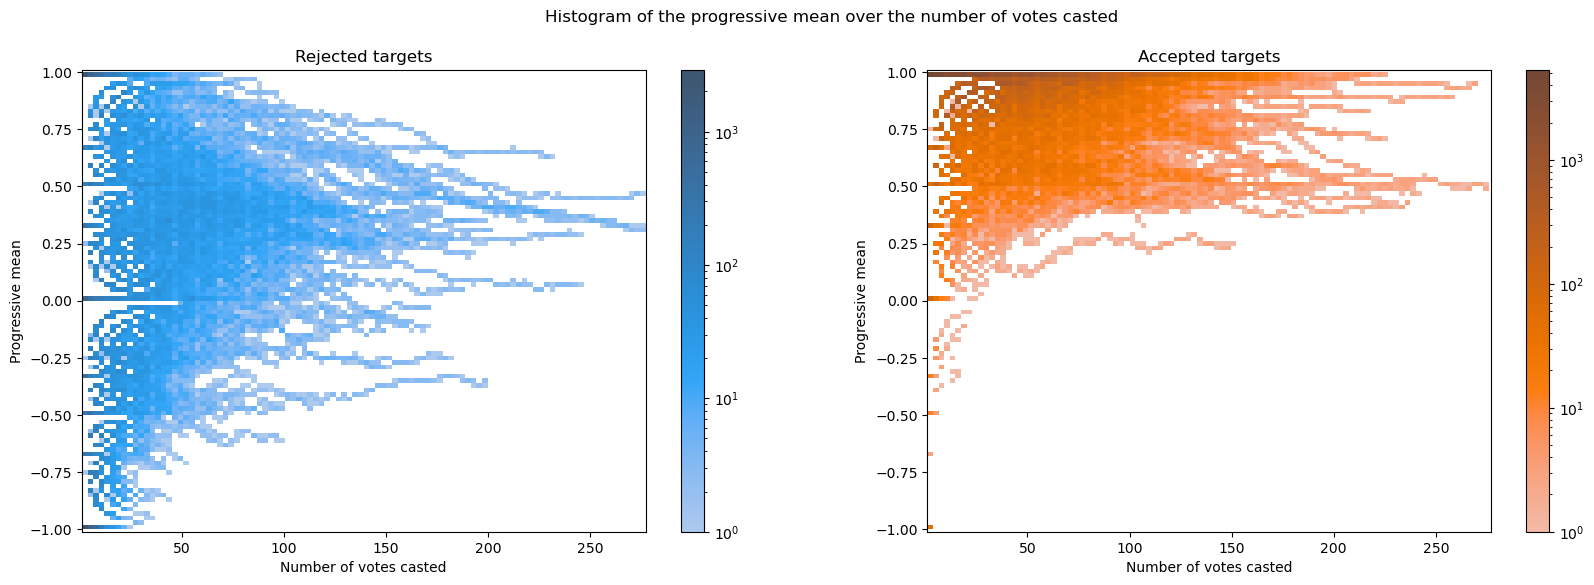

In [10]:
plot_time_distribution(df_vote_evolution, 'Voting_time')
plot_time_distribution(df_vote_evolution, 'Vote_number')

With these plots we can see that even though the distribution of the progressive mean for the rejected targets is more spread out and lower than the one for the accepted targets, there is still numerous cases where both groups overlap.  

# Prediction of the results based on early votes

To have a better quantification of how early the outcome of the election can be predicted we compute the probability of a target to be accepted based on the progressive mean of the first votes and using a Gradient Boosting Classifier. To assess the performance of the model we compute several metrics: accuracy, precision, recall that we then plot in function of the number of first votes used to do the prediction. We also show the confidence interval of the measure we got using cross-validation.

In [11]:
if False: # Takes a 40 minutes to run
    # Predict the result for each target with the first 5, 10, 15, ..., 50 votes using a gradient boosting classifier and cross validation to evaluate the performance
    nb_first_votes = np.concatenate((np.arange(1,5), np.arange(5, 71, 5)))
    scores = early_vote_prediction(df_vote_evolution, nb_first_votes, 10)
    # Save the results
    scores.to_csv('scores.csv', index=False)

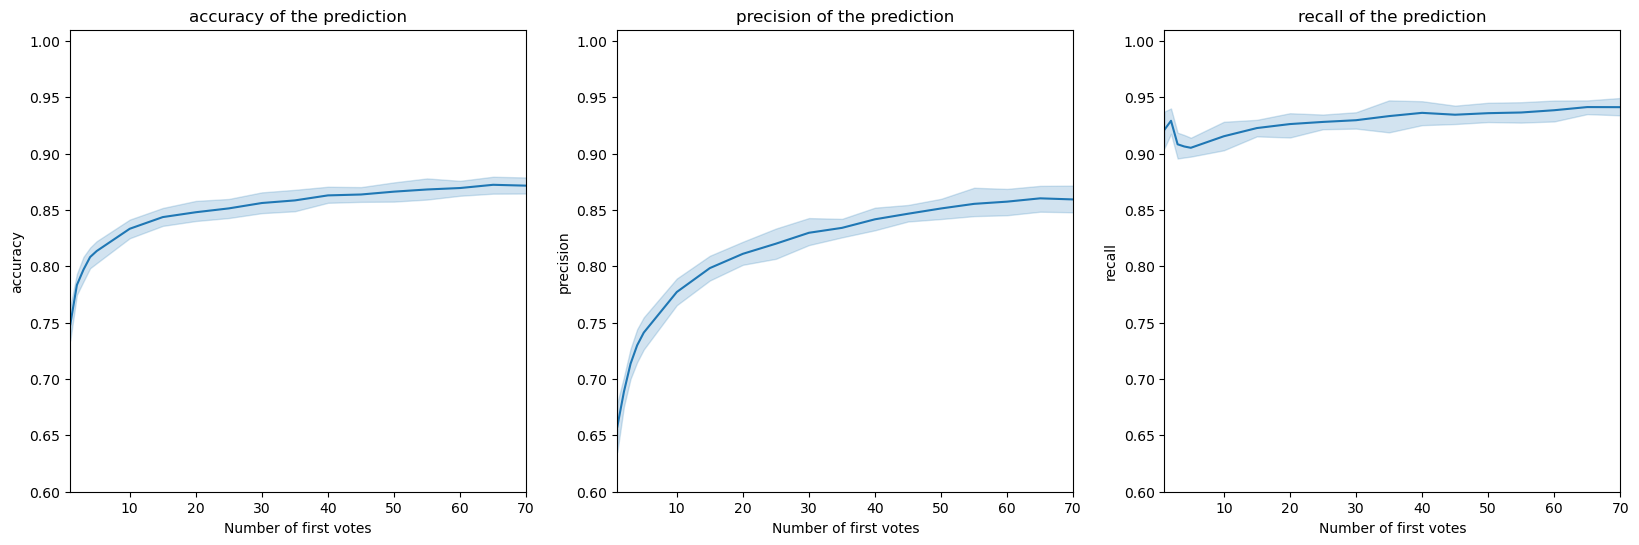

In [12]:
scores = pd.read_csv('scores.csv')
plot_prediction_scores(scores)

The accuracy is relatively high (around 0.87 at the plateau) but knowing the imbalance of the dataset between accepted and rejected targets (around 62% of the targets are accepted) we prefer to look at the precision and recall. Moreover, to have a better understanding of what shapes the election process it is particularly interesting to examine the reasons why some users are likely to be rejected.
And actually the curve of the recall is notably higher than the one of the accuracy (around 0.95 at the plateau but relatively stable from the beginning) whereas the curve of the precision is more similar to the one of the accuracy. 

# Analysis of the sources

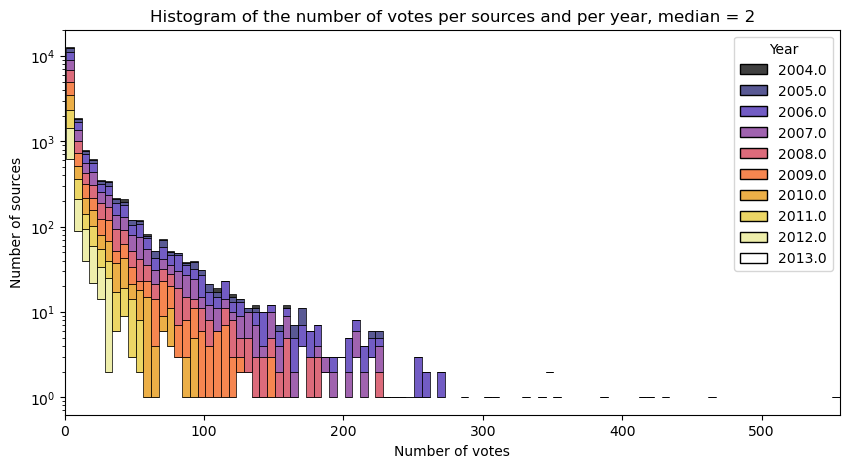

In [13]:
plot_nb_votes_per_source(df_vote_evolution)

In [21]:
df_source = get_source_df(df_vote_evolution)
df_source.sample(5)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,Vote_number,progressive_mean
48600,Santa Claus of the Future,Jeffrey Mall,-1,-1.0,2009.0,2009-11-16 03:15:00,"'''Oppose''', due to answer to question five. ...",1,1 days 23:16:59.999999998,38,0.078947
42409,Acalamari,Someguy1221,1,1.0,2009.0,2009-03-25 01:11:00,Fine user.,1,6 days 06:12:00,66,0.954545
45530,RegentsPark,BQZip01,1,-1.0,2009.0,2009-05-07 23:55:00,'''Support''' seems to care about wikipedia an...,4,0 days 22:40:00.000000004,50,0.460000
123127,Lradrama,Tanner-Christopher,-1,-1.0,2007.0,2007-09-20 08:22:00,"'''Oppose''' - more experience needed yet, alt...",2,3 days 02:45:00,9,0.555556
9239,RegentsPark,PumpkinSky,1,-1.0,2012.0,2012-10-23 13:20:00,'''Support''' (Switched from oppose.) Thought ...,1,0 days 14:33:00,52,0.538462


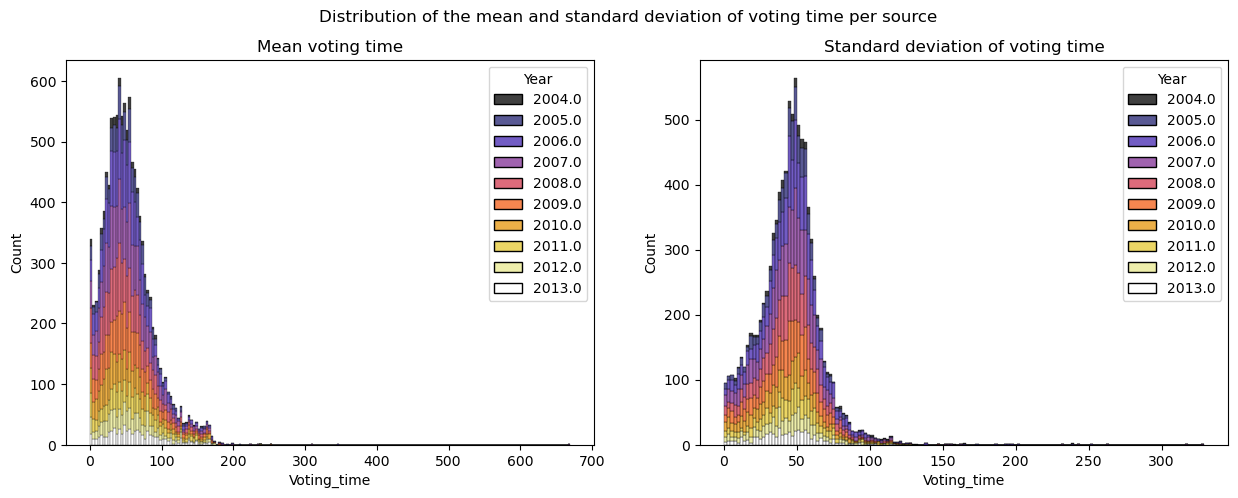

In [24]:
# Distribution of the number of votes per source (histogram)
def plot_mean_std_time(df):
    # Remove the source 
    data = df.copy()
    data.Voting_time = time_to_float(data.Voting_time)
    means = data.groupby(['Source', 'Year'])['Voting_time'].mean().reset_index()
    stds = data.groupby(['Source', 'Year'])['Voting_time'].std().reset_index()
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(data=means, x='Voting_time', hue='Year', ax=ax[0], palette='CMRmap', multiple='stack')
    ax[0].set_title('Mean voting time')
    sns.histplot(data=stds, x='Voting_time', hue='Year', ax=ax[1], palette='CMRmap', multiple='stack')
    ax[1].set_title('Standard deviation of voting time')
    fig.suptitle('Distribution of the mean and standard deviation of voting time per source')
    plt.savefig('Figures/mean_std_time.png')
    plt.show()

plot_mean_std_time(df_source)

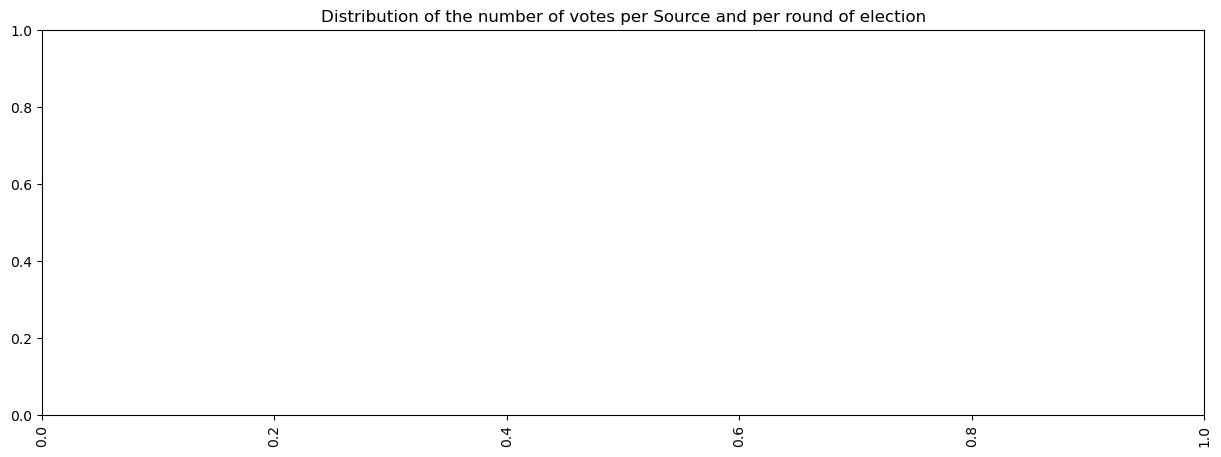

In [ ]:
# Distribution of the number of votes per source and per round of election
def plot_vote_distribution_by_round(df, col):
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=90)
    plt.title('Distribution of the number of votes per ' + col + ' and per round of election')
    plt.show()

plot_vote_distribution_by_round(df, 'Source')